<a href="https://colab.research.google.com/github/HolyTostadora/Tp-final-ia/blob/main/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install tensorflow

! pip install --upgrade keras-cv
! pip install --upgrade keras-hub
! pip install --upgrade keras
! pip install keras-visualizer
! pip install keras-visualizer --upgrade


!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.1/644.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-k

In [ ]:
!apt-get install -y graphviz
!pip install pydot graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, models
from keras import models, layers
from keras_visualizer import visualizer
from keras.utils import plot_model
import streamlit as st

print(tf.__version__)

2.18.0


In [ ]:
#https://www.kaggle.com/datasets/kshitij192/cars-image-dataset/data

In [ ]:
# Rutas a las carpetas de entrenamiento y prueba

train_path = "/content/drive/MyDrive/Cars Dataset/train"
test_path = "/content/drive/MyDrive/Cars Dataset/test"

# Crear el dataset de entrenamiento
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',  # Asignará etiquetas basadas en los nombres de las carpetas
    label_mode='int',   # Etiquetas como enteros
    image_size=(300,170),
    batch_size=16,  # Tamaño de lote
    shuffle=True,  # Mezclar las imágenes
)

# Crear el dataset de prueba
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',  # Asignará etiquetas basadas en los nombres de las carpetas
    label_mode='int',   # Etiquetas como enteros
    image_size=(300,170),
    batch_size=16,  # Tamaño de lote
    shuffle=False,  # No mezclar para mantener el orden
)

# Inspeccionar las clases
class_names = train_dataset.class_names
print(f"Clases: {class_names}")
print(f"Batches de entrenamiento: {len(train_dataset)}")
print(f"Batches de prueba: {len(test_dataset)}")


Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.
Clases: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
Batches de entrenamiento: 210
Batches de prueba: 51


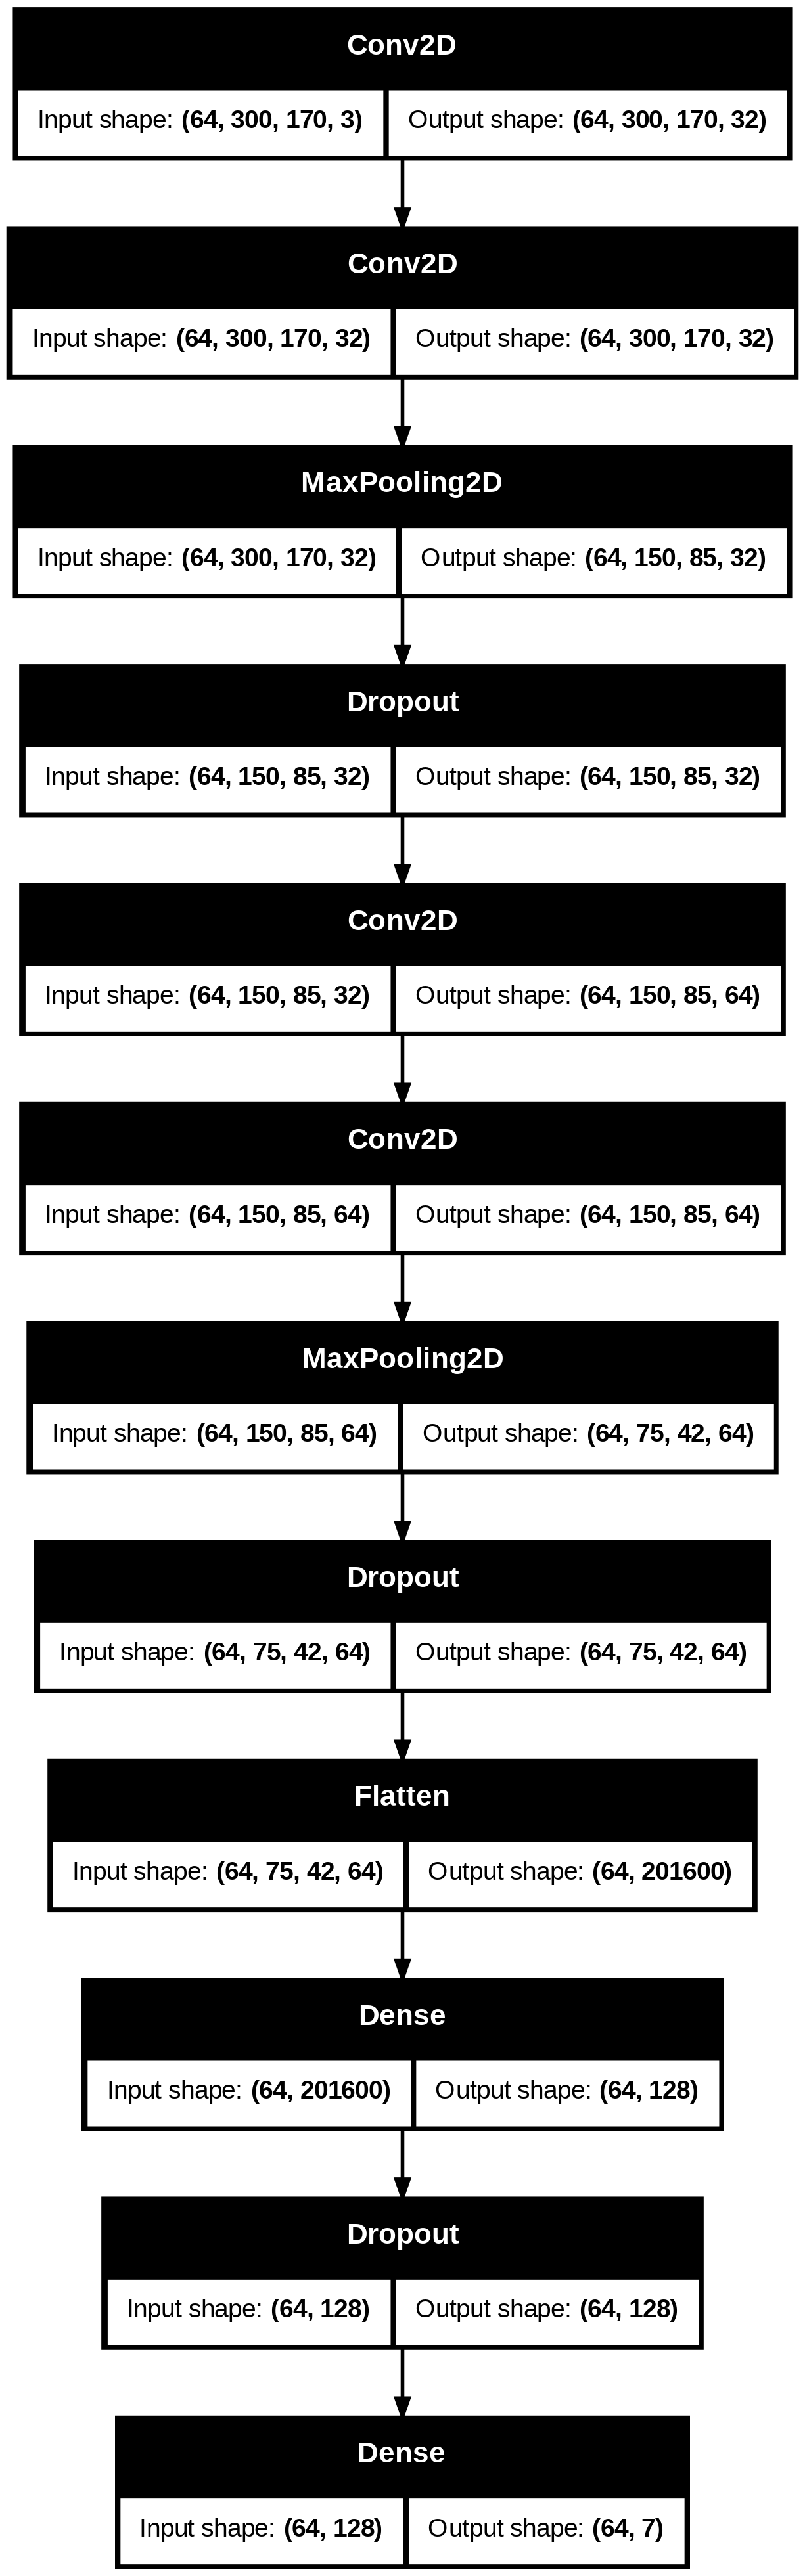

In [ ]:
# Crear el modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300,170, 3), batch_size=64),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])
from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes=True) # Visualize model and save as PNG
#visualizer(model, file_format='png', view=True)
Image('model.png')

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (64, 300, 170, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (64, 300, 170, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (64, 150, 85, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (64, 150, 85, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (64, 150, 85, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (64, 150, 85, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (64, 75, 42, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (64, 75, 42, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (64, 201600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (64, 128)                   │      25,804,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (64, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (64, 7)                     │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,889,319 (98.76 MB)

 Trainable params: 25,889,319 (98.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Normalización de las imágenes (valores entre 0 y 1)
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Mejorar el rendimiento con prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Changed 'acc' to 'accuracy' to reflect the correct key in the logs dictionary
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
epochs = 2

history = model.fit(
  train_dataset,
  epochs=epochs,
  callbacks=[callbacks],
  validation_data=test_dataset
)


Epoch 1/2
210/210 ━━━━━━━━━━━━━━━━━━━━ 1682s 8s/step - accuracy: 0.2343 - loss: 2.0224 - val_accuracy: 0.2706 - val_loss: 1.8268
Epoch 2/2
210/210 ━━━━━━━━━━━━━━━━━━━━ 1665s 8s/step - accuracy: 0.2767 - loss: 1.8421 - val_accuracy: 0.2989 - val_loss: 1.7853


51/51 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4905 - loss: 1.7398
Precisión en el conjunto de prueba: 0.30


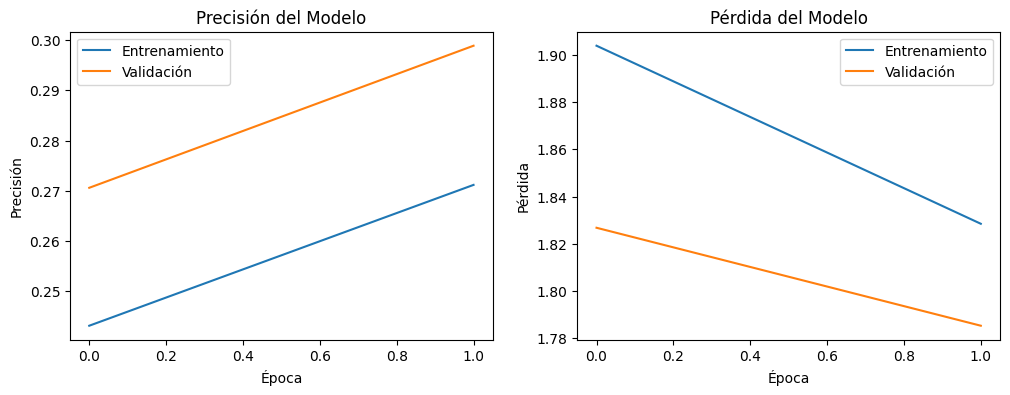

In [ ]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Graficar el rendimiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del Modelo')

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida del Modelo')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


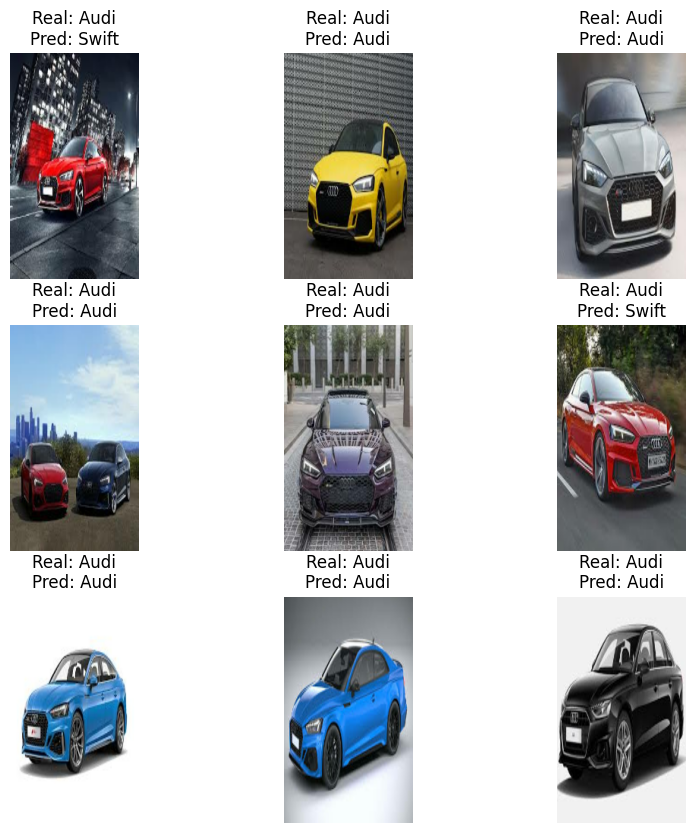

In [ ]:
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Asegurarse de que las imágenes estén en el rango [0, 255]
        img = images[i].numpy()
        if img.max() <= 1:  # Si la imagen está normalizada
            img = (img * 255).astype("uint8")

        plt.imshow(img)
        true_label = class_names[labels[i].numpy()]  # Asegurar conversión a numpy
        predicted_label = class_names[predicted_classes[i].numpy()]  # Asegurar conversión

        plt.title(f"Real: {true_label}\nPred: {predicted_label}")
        plt.axis("off")


In [ ]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Cargar el modelo
model = tf.keras.models.load_model('model.h5')


# Configuración de Streamlit
st.title("Clasificador de Imágenes")
st.write("Sube una imagen para predecir a qué categoría pertenece.")

# Subir la imagen
uploaded_image = st.file_uploader("Sube una imagen", type=["jpg", "png", "jpeg"])

if uploaded_image is not None:
    # Mostrar la imagen subida
    image = Image.open(uploaded_image)
    st.image(image, caption="Imagen subida", use_column_width=True)
    st.write("")

    # Preprocesar la imagen para que coincida con el formato de entrada del modelo
    image = image.resize((224, 224))  # Redimensionar si es necesario
    image = np.array(image) / 255.0  # Normalizar
    image = np.expand_dims(image, axis=0)  # Añadir dimensión para el batch

    # Hacer predicción
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)  # La categoría con mayor probabilidad

    # Mostrar la categoría predicha
    categories = ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Categoria 4', 'Categoria 5', 'Categoria 6', 'Categoria 7']
    predicted_category = categories[predicted_class[0]]

    st.write(f"Predicción: {predicted_category}")


Writing app.py


In [ ]:
from google.colab import files

# Descargar el archivo app.py
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!pip freeze > requirements.txt
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>